In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normal distribution

## Distribució Normal
Simulamos una distribución normal para. Ejemplo: Edades de un grupo de 1000 personas, con una media de 20 y una desviación standarda de 3.5

In [18]:
age_array = np.random.normal(20, 3.5, 1000)

<Axes: ylabel='Count'>

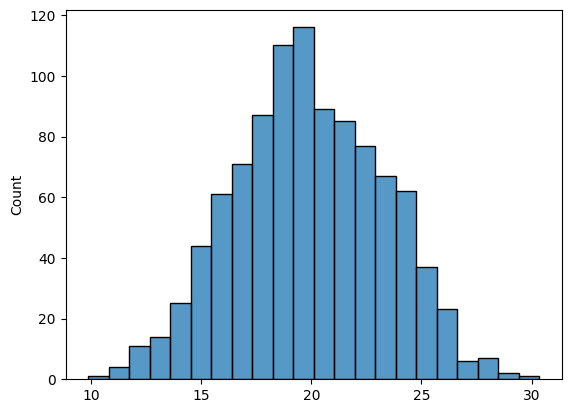

In [19]:
sns.histplot(age_array)

## Distribución Normal Standard

Distribución normal con centro en 0 y desviación standard de 1

In [15]:
# 2 formas
std_normal_dist_1 = np.random.normal(0, 1 , 1000)
std_normal_dist_2 = np.random.standard_normal(1000)

<Axes: ylabel='Count'>

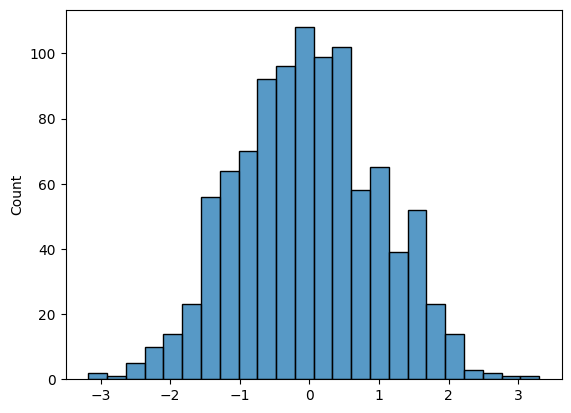

In [17]:
sns.histplot(std_normal_dist_2)

## Normalización o Standarización

Si tenemos un intervalo y queremos compararlo con una distribución normal, podemos realizar el proceso de normalización o standarización, hayando los z-scores

In [22]:
# Tomando como referencia el dataset de edades
age_array_std = (age_array - np.mean(age_array))/ np.std(age_array)

<Axes: ylabel='Count'>

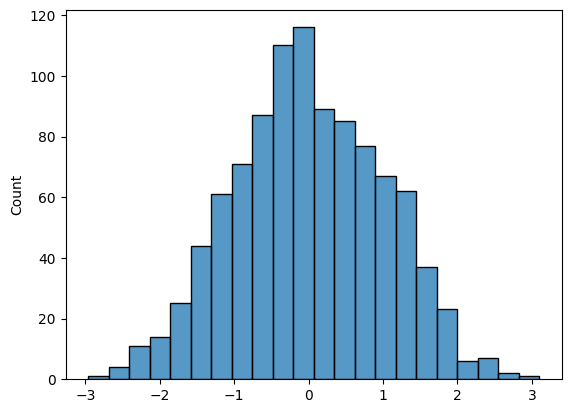

In [23]:
sns.histplot(age_array_std)

## QQ-Plot (Quantile-Quantile)

Una herramienta útil es comparar un conjunto de datos versus una distribución normal.

In [24]:
import scipy.stats as stats 

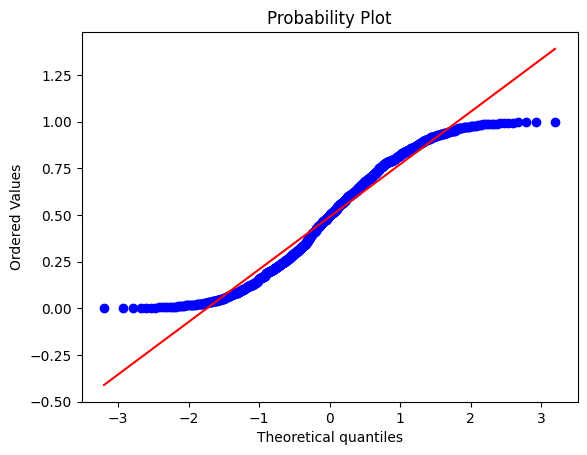

In [43]:
# Creamos una distribución uniforme
test_dist = np.random.random(1000)

# Creamos una gráfica QQ-Plot
stats.probplot(test_dist, dist='norm', plot=plt)
plt.show()

# T-Distribution

T-distribution its similar to a normal distribution in the sape, but tends to have longer tails. It has a parameter named 'Degrees of Freedom', the higher the DF the closest to a normal distribution, the lower the DF the longer the tails. DF must be higher than 0

In [74]:
df = 5
t_dist = np.random.standard_t(df, 1000)

<Axes: ylabel='Count'>

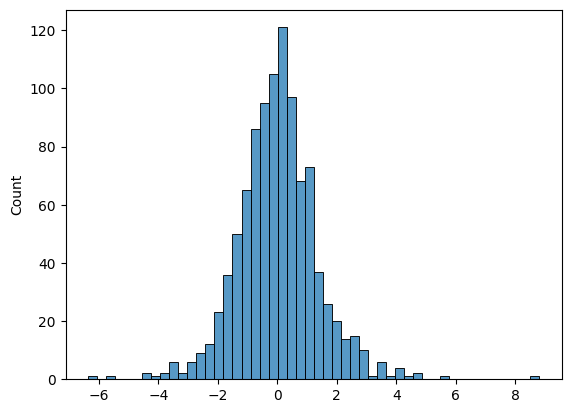

In [76]:
sns.histplot(t_dist)

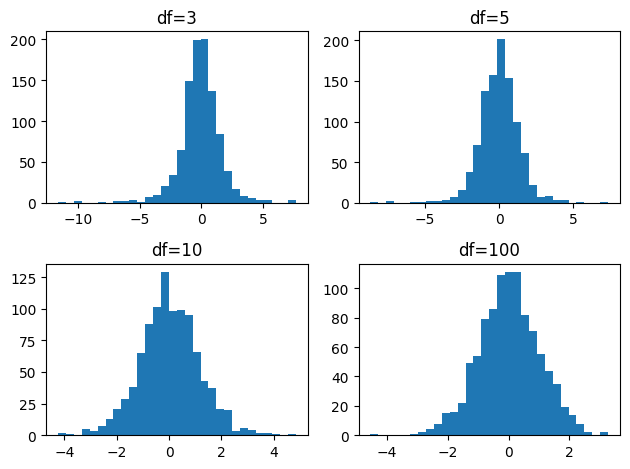

In [ ]:
# Here we adjust the DF (degrees of freedom to see the difference)
df_list = [3, 5, 10, 100]


fig, axs = plt.subplots(2,2)


df_count = 0
for i in range(2):
    for j in range(2):
        df_value = df_list[df_count]
        axs[i,j].hist(np.random.standard_t(df_value, 1000), bins=30)
        axs[i,j].set_title(f'df={df_value}')
        df_count+=1

plt.tight_layout()


# Binomial Distribution (Bernoulli)

Distribución de probabilidad para un experimento binomial, donde:
 - n= numero de intentos
 - p= probabilidad de éxito por intento

In [167]:
 # probabilidad de que 1 intento sea exitoso, en 4 experimentos, donde la probabilidad de éxito por experimento es 50%
stats.binom.pmf(1, n=4, p=0.5) 

np.float64(0.25)

In [170]:
 # Probabilidad acumulada, es decir, probabilidad de que bien, [0, 1 o 2] exitos ocurran
stats.binom.cdf(2, n=4,p=0.5)

np.float64(0.6875)

In [175]:
#¿Si quisieramos calcular la probabilidad de que al menos 1 intento sea exitoso?
1 - stats.binom.cdf(0, n=50, p=0.125)

np.float64(0.9987399068487982)

## Gráfica de densidad de probabilidad

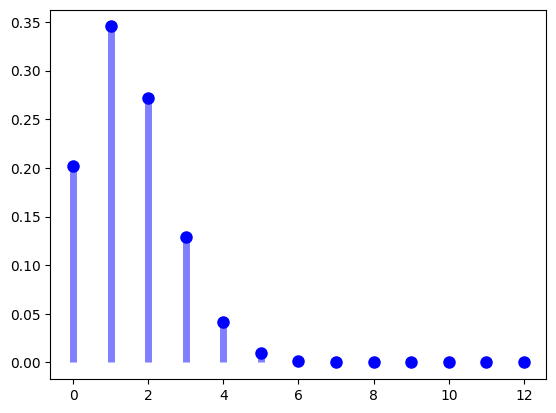

In [211]:
# Quisiera graficar las probabilidades.
n, p = 12, 0.125                                  #def n y p
cases = list(range(n+1))                        # almacenamos los casos de exito 
probabilities = stats.binom.pmf(cases, n, p )    # calculamos la probabilidad para cada caso.

fig, ax = plt.subplots(1, 1)
ax.plot(cases, probabilities, 'bo', ms=8, label='binom pmf')
ax.vlines(cases, 0, probabilities, colors='b', lw=5, alpha=0.5)
plt.show()